# Template Matching

- Similar to finding substring in a string.
- Checks if an image is a part of a another or not.

In [31]:
import numpy as np, matplotlib.pyplot as plt
import cv2

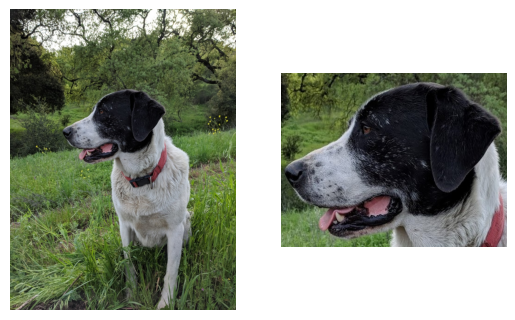

In [32]:
dog = cv2.imread('D:\\CSE 410 - Computer Vision\\data\\mainimage.jpg')
dog_template = cv2.imread('D:\\CSE 410 - Computer Vision\\data\\template.jpg')

dog_template = cv2.cvtColor(dog_template, cv2.COLOR_BGR2RGB)
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(dog), plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(dog_template), plt.axis("off")
plt.show()

### Types of matching

- `cv2.TM_CCOEFF`: This method uses correlation to find the best match. It calculates the sum of products between the template and the image. Higher values indicate a better match.

- `cv2.TM_CCOEFF_NORMED`: Normalized cross-correlation. Similar to TM_CCOEFF but values are normalized to the range [-1, 1]. 1 represents a perfect match.

- `cv2.TM_CCORR`: Correlation but without mean subtraction. Not as commonly used.

- `cv2.TM_CCORR_NORMED`: Normalized version of TM_CCORR.

- `cv2.TM_SQDIFF`: Sum of squared differences. Lower values represent a better match (0 is a perfect match).

- `cv2.TM_SQDIFF_NORMED`: Normalized sum of squared differences.

The result is a grayscale image where each pixel represents how well the template matches the corresponding neighborhood in the input image.

(<matplotlib.image.AxesImage at 0x2638592dde0>, (-0.5, 539.5, 992.5, -0.5))

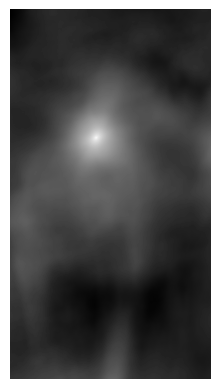

In [33]:
result = cv2.matchTemplate(dog, dog_template, cv2.TM_CCOEFF_NORMED)

plt.imshow(result, cmap="gray"), plt.axis("off")

- DIMENSION:
  - result_width = image_width - template_width + 1
  - result_height = image_height - template_height + 1

  Where, image_width - template_width is maximum X-cordinate and image_height - template_height is maximum Y-cordinate

In [34]:
print(dog.shape)

print(dog_template.shape)

print(result.shape)

(1367, 1025, 3)
(375, 486, 3)
(993, 540)


### Applying all the types of methods

In [35]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

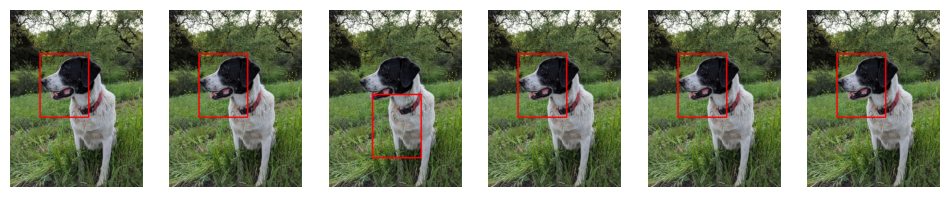

In [37]:
outputs = []

for meth in methods:
    # Copy of original image
    dog_copy = dog.copy()

    # Get the method using eval
    method = eval(meth)

    # Apply template matching
    result = cv2.matchTemplate(dog_copy, dog_template, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        best_match_loc = min_loc
    else:
        best_match_loc = max_loc
    
    # Draw a rectangle around the best matched region
    top_left = best_match_loc
    bottom_right = (top_left[0] + dog_template.shape[0], top_left[1] + dog_template.shape[1])
    outputs.append(cv2.rectangle(dog_copy, top_left, bottom_right, 255, 10))

plt.figure(figsize=(12, 10))    
for i, output in enumerate(outputs):
    plt.subplot(1, 6, i+1)
    plt.imshow(output), plt.axis("off")
plt.show()
